In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
col_names = ["UniProt_ID", "Species", "Kingdom", "Seq_Length", "Cleavage", "T or B"]

pos = pd.read_csv("pos_dss.tsv", sep = "\t", names = col_names)

print(pos.head(5))

  UniProt_ID          Species  Kingdom  Seq_Length  Cleavage  T or B
0     P52798     Homo sapiens  Metazoa         201        25       1
1     P17948     Homo sapiens  Metazoa        1338        26       1
2     Q8WWA0     Homo sapiens  Metazoa         313        18       1
3     O75629     Homo sapiens  Metazoa         220        31       1
4     P19069  Cavia porcellus  Metazoa        1742        19       1


In [ ]:
print((pos['T or B'] == 0).value_counts())

T or B
False    874
True     219
Name: count, dtype: int64


In [ ]:
def edit_fasta(fasta, cleaned_fasta):
    with open(fasta, "r") as reader:
        for line in reader:
            if line.startswith(">"):
                with open(cleaned_fasta, "a") as writer:
                    writer.write("\n>"+line.split("|")[1]+"\n")
            else:
                l = line.rstrip()
                with open(cleaned_fasta, "a") as writer:
                    writer.write(l)

edit_fasta("pos_rand.fasta", "pos_cleaned.fasta")

# After using this function is necessary to manually delete the first line of the file.

In [ ]:
cleavages = []
for index,row in pos.iterrows():
  cleavages.append(row["Cleavage"])

cleavages_train = cleavages[:874]
cleavages_bench = cleavages[874:]

print(len(cleavages_train), len(cleavages_bench))

sps_train = []
sps_bench = []
i = 0
j = 0
with open("pos_cleaned.fasta", "r") as reader:
  for line in reader:
    if not line.startswith(">") and i < 874:
      sps_train.append(line[:cleavages_train[i]])
      i += 1
    elif not line.startswith(">") and j < len(cleavages_bench):
      sps_bench.append(line[:cleavages_bench[j]])
      j += 1

print(len(sps_train), len(sps_bench))

874 219
874 219


In [ ]:
residues_train = {"A" : 0, "C" : 0, "D" : 0, "E" : 0, "F" : 0, "G" : 0, "H" : 0, "I" : 0, "K" : 0,
            "L" : 0, "M" : 0, "N" : 0, "P" : 0, "Q" : 0, "R" : 0, "S" : 0, "T" : 0, "V" : 0,
            "W" : 0, "Y" : 0}
#tot_x_l = []
tot_x = 0
tot_aa = 0
#i = 0
for seq in sps_train:
  for res in seq:
    tot_aa += 1
    if res != "X" and res != "\n":
      residues_train[res] += 1
    else:
      #tot_x_l[i] = tot_x_l[i] + 1
      tot_x += 1
  #tot_x_l.append(0)
  #if tot_x_l[i] != 0:
    #print("In sequence "+str(i)+"we have a total of "+str(tot_x_l[i])+" X\n")
  #i += 1

print("\nWe have a total of "+str(tot_x)+" X in our training set, on a total of "+str(tot_aa)+" residues.\n")

composition_train = {"A" : 0, "C" : 0, "D" : 0, "E" : 0, "F" : 0, "G" : 0, "H" : 0, "I" : 0, "K" : 0,
            "L" : 0, "M" : 0, "N" : 0, "P" : 0, "Q" : 0, "R" : 0, "S" : 0, "T" : 0, "V" : 0,
            "W" : 0, "Y" : 0}

for res in residues_train:
  composition_train[res] = round(float(residues_train[res]/(tot_aa - tot_x))*100,2)
print(composition_train)

residues_bench = {"A" : 0, "C" : 0, "D" : 0, "E" : 0, "F" : 0, "G" : 0, "H" : 0, "I" : 0, "K" : 0,
            "L" : 0, "M" : 0, "N" : 0, "P" : 0, "Q" : 0, "R" : 0, "S" : 0, "T" : 0, "V" : 0,
            "W" : 0, "Y" : 0}

#tot_x_l = []
tot_x = 0
tot_aa = 0
#i = 0
for seq in sps_bench:
  for res in seq:
    tot_aa += 1
    if res != "X" and res != "\n":
      residues_bench[res] += 1
    else: #i < len(tot_x_l):
      #tot_x_l[i] = tot_x_l[i] + 1
      tot_x += 1
  #tot_x_l.append(0)
  #if tot_x_l[i] != 0:
    #print("In sequence "+str(i)+"we have a total of "+str(tot_x_l[i])+" X\n")
  #i += 1
print("\nWe have a total of "+str(tot_x)+" X in our bench set, on a total of "+str(tot_aa)+" residues.\n")

composition_bench = {"A" : 0, "C" : 0, "D" : 0, "E" : 0, "F" : 0, "G" : 0, "H" : 0, "I" : 0, "K" : 0,
            "L" : 0, "M" : 0, "N" : 0, "P" : 0, "Q" : 0, "R" : 0, "S" : 0, "T" : 0, "V" : 0,
            "W" : 0, "Y" : 0}

for res in residues_bench:
  composition_bench[res] = round(float(residues_bench[res]/(tot_aa - tot_x))*100,2)

print(composition_bench)

for i in sps_bench:
  for j in i:
    if j == "\n":
      print("eccolo")
# THE LAST SP IS A NEWLINE :(


We have a total of 10 X in our training set, on a total of 20108 residues.

{'A': 14.21, 'C': 2.96, 'D': 0.84, 'E': 1.31, 'F': 5.1, 'G': 6.04, 'H': 1.1, 'I': 4.58, 'K': 2.25, 'L': 21.93, 'M': 6.32, 'N': 1.02, 'P': 4.15, 'Q': 2.03, 'R': 3.29, 'S': 7.57, 'T': 4.32, 'V': 8.12, 'W': 1.79, 'Y': 1.06}

We have a total of 0 X in our bench set, on a total of 4914 residues.

{'A': 14.63, 'C': 2.63, 'D': 0.94, 'E': 1.42, 'F': 4.64, 'G': 5.84, 'H': 1.16, 'I': 4.31, 'K': 2.08, 'L': 22.06, 'M': 6.37, 'N': 0.92, 'P': 3.85, 'Q': 2.08, 'R': 2.99, 'S': 7.39, 'T': 5.03, 'V': 9.08, 'W': 1.75, 'Y': 0.85}


In [ ]:
# from swissprot

swissprot = {"A" : 8.25, "C" : 1.38, "D" : 5.46, "E" : 6.71, "F" : 3.86, "G" : 7.07, "H" : 2.27, "I" : 5.90, "K" : 5.79,
            "L" : 9.64, "M" : 2.41, "N" : 4.06, "P" : 4.74, "Q" : 3.93, "R" : 5.52, "S" : 6.65, "T" : 5.36, "V" : 6.85,
            "W" : 1.10, "Y" : 2.92}

# residue | composition | database
#data = [composition_train, composition_bench, swissprot]
#df = pd.DataFrame.from_records(data, index = ["Training", "Benchmarking", "SwissProt"])

lab = ["residue", "composition"]

comp_t = pd.DataFrame(list(composition_train.items()),
                  columns=lab)
comp_t["database"] = "T"
#print(comp_t)
comp_b = pd.DataFrame(list(composition_bench.items()),
                  columns=lab)
comp_b["database"] = "B"
#print(comp_b)
comp_s = pd.DataFrame(list(swissprot.items()),
                  columns=lab)
comp_s["database"] = "S"
#print(comp_s)
frames = [comp_t, comp_b, comp_s]

composition = pd.concat(frames, ignore_index=True)
#print(composition)
composition = composition.sort_values(by = ["residue"]).reset_index(drop=True)
print(composition)


#df_inv = df.pivot(columns = 'var', values = 'val' )
#print(df_inv.head(5))  '''

   residue  composition database
0        A        14.21        T
1        A        14.63        B
2        A         8.25        S
3        C         2.96        T
4        C         2.63        B
5        C         1.38        S
6        D         0.84        T
7        D         0.94        B
8        D         5.46        S
9        E         1.31        T
10       E         1.42        B
11       E         6.71        S
12       F         5.10        T
13       F         4.64        B
14       F         3.86        S
15       G         5.84        B
16       G         7.07        S
17       G         6.04        T
18       H         2.27        S
19       H         1.10        T
20       H         1.16        B
21       I         5.90        S
22       I         4.58        T
23       I         4.31        B
24       K         2.08        B
25       K         5.79        S
26       K         2.25        T
27       L         9.64        S
28       L        22.06        B
29       L

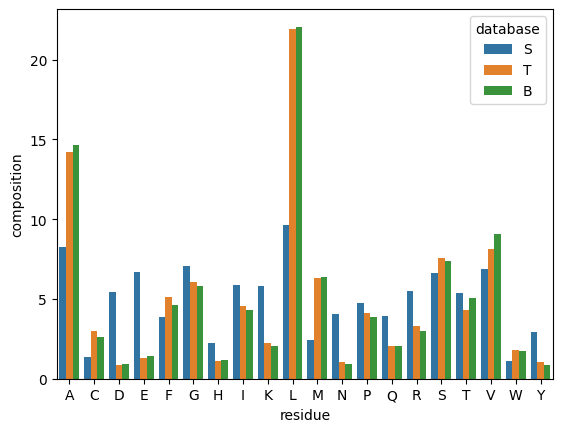

In [ ]:
sns.barplot(data = composition, x = "residue", y = "composition", hue = "database", hue_order= ["S", "T", "B"])

plt.show()
